 # DL Assignment 1

-------------------------------------------------------------------------------

## Topic: Implementing Deep Neural Networks using multiple Optimizers and Learning Rates

Name: Priyanka Nandkumar Gaikwad

Roll no: 23

PRN: 12210124

Handwritten Digit Classification (classification): https://www.tensorflow.org/datasets/catalog/mnist

Wildfire Detection from Aerial Images (classification): https://www.kaggle.com/datasets/brsdincer/wildfire-detection-image-data


## Part A
Handwritten Digit Classification on inbuilt MNIST dataset

### Load and preprocess images

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


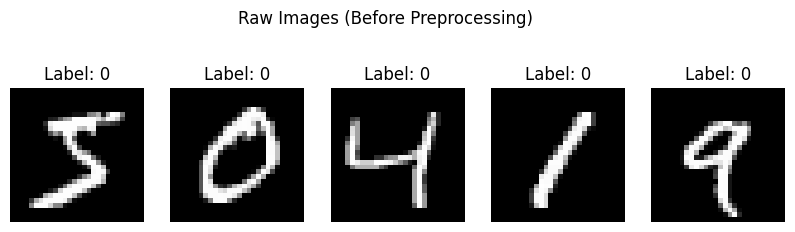

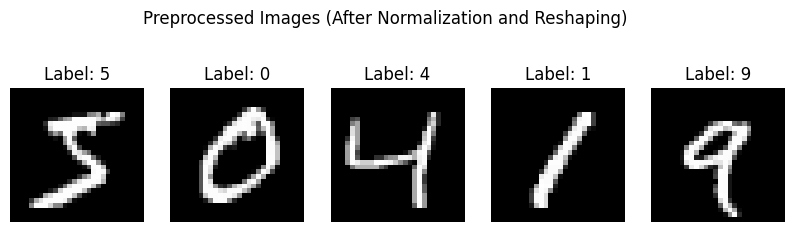

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Display raw images before preprocessing
num_images=5
plt.figure(figsize=(10, 3))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {np.argmax(train_labels[i])}")
    plt.axis('off')
plt.suptitle("Raw Images (Before Preprocessing)")
plt.show()



# Preprocess the data
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_images = train_images.reshape(train_images.shape[0], 28 * 28)
test_images = test_images.reshape(test_images.shape[0], 28 * 28)

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Show preprocessed images
plt.figure(figsize=(10, 3))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(train_labels[i])}")
    plt.axis('off')
plt.suptitle("Preprocessed Images (After Normalization and Reshaping)")
plt.show()


### Class Distributions

In [ ]:
class_names = [str(i) for i in range(10)]


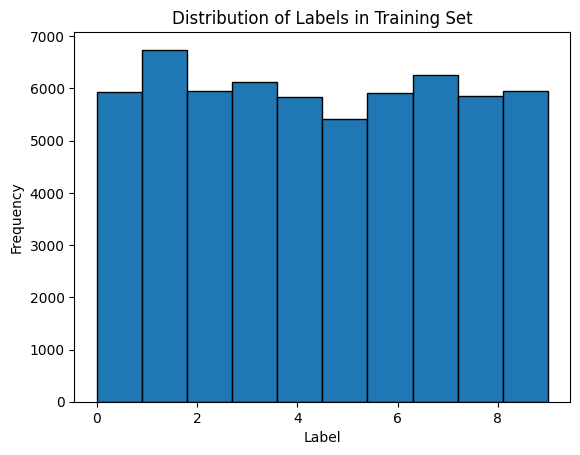

In [ ]:
plt.hist(np.argmax(train_labels, axis=1), bins=10, edgecolor='black')
plt.title("Distribution of Labels in Training Set")
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.show()

In [ ]:
print("Training Images Shape:", train_images.shape)
print("Test Images Shape:", test_images.shape)
print("Training Labels Shape:", train_labels.shape)
print("Test Labels Shape:", test_labels.shape)

Training Images Shape: (60000, 784)
Test Images Shape: (10000, 784)
Training Labels Shape: (60000, 10)
Test Labels Shape: (10000, 10)


### Model Definition, Compilation, Training

#### Optimizers:Adam, SGD, RMSprop
#### Learning Rates:0.001, 0.01, 0.0001

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

#Function to define model
def build_modelA():
    model = models.Sequential([
        layers.Flatten(input_shape=(28* 28,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model



optimizers = [Adam, SGD, RMSprop]
learning_rates = [0.001, 0.01, 0.0001]

history_dictA = {}
trained_models = {}

#Compiling and Fit Model on dataset
for optimizer in optimizers:
    for lr in learning_rates:
        model= build_modelA()
        model.compile(optimizer= optimizer(learning_rate= lr), loss= 'categorical_crossentropy', metrics= ['accuracy'])
        history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels), verbose=1)

        history_dictA[(optimizer.__name__, lr)] = history
        trained_models[(optimizer.__name__, lr)] = model

        # Evaluate model performance
        test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
        print(f"\nTest accuracy for {optimizer.__name__} with learning rate {lr}: {test_acc}")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8777 - loss: 0.4179 - val_accuracy: 0.9610 - val_loss: 0.1210
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9669 - loss: 0.1076 - val_accuracy: 0.9705 - val_loss: 0.0930
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9797 - loss: 0.0658 - val_accuracy: 0.9728 - val_loss: 0.0835
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9846 - loss: 0.0479 - val_accuracy: 0.9699 - val_loss: 0.0951
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9864 - loss: 0.0406 - val_accuracy: 0.9788 - val_loss: 0.0695
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9903 - loss: 0.0305 - val_accuracy: 0.9721 - val_loss: 0.1005
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9905 - loss: 0.0288 - val_accuracy: 0.9775 - val_loss: 0.0794
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9926 - loss: 0.0213 - 

## Classification Evaluation for Each model

### Classification Reports and Confusion Matrices


                             CLASSIFICATION REPORTS                             



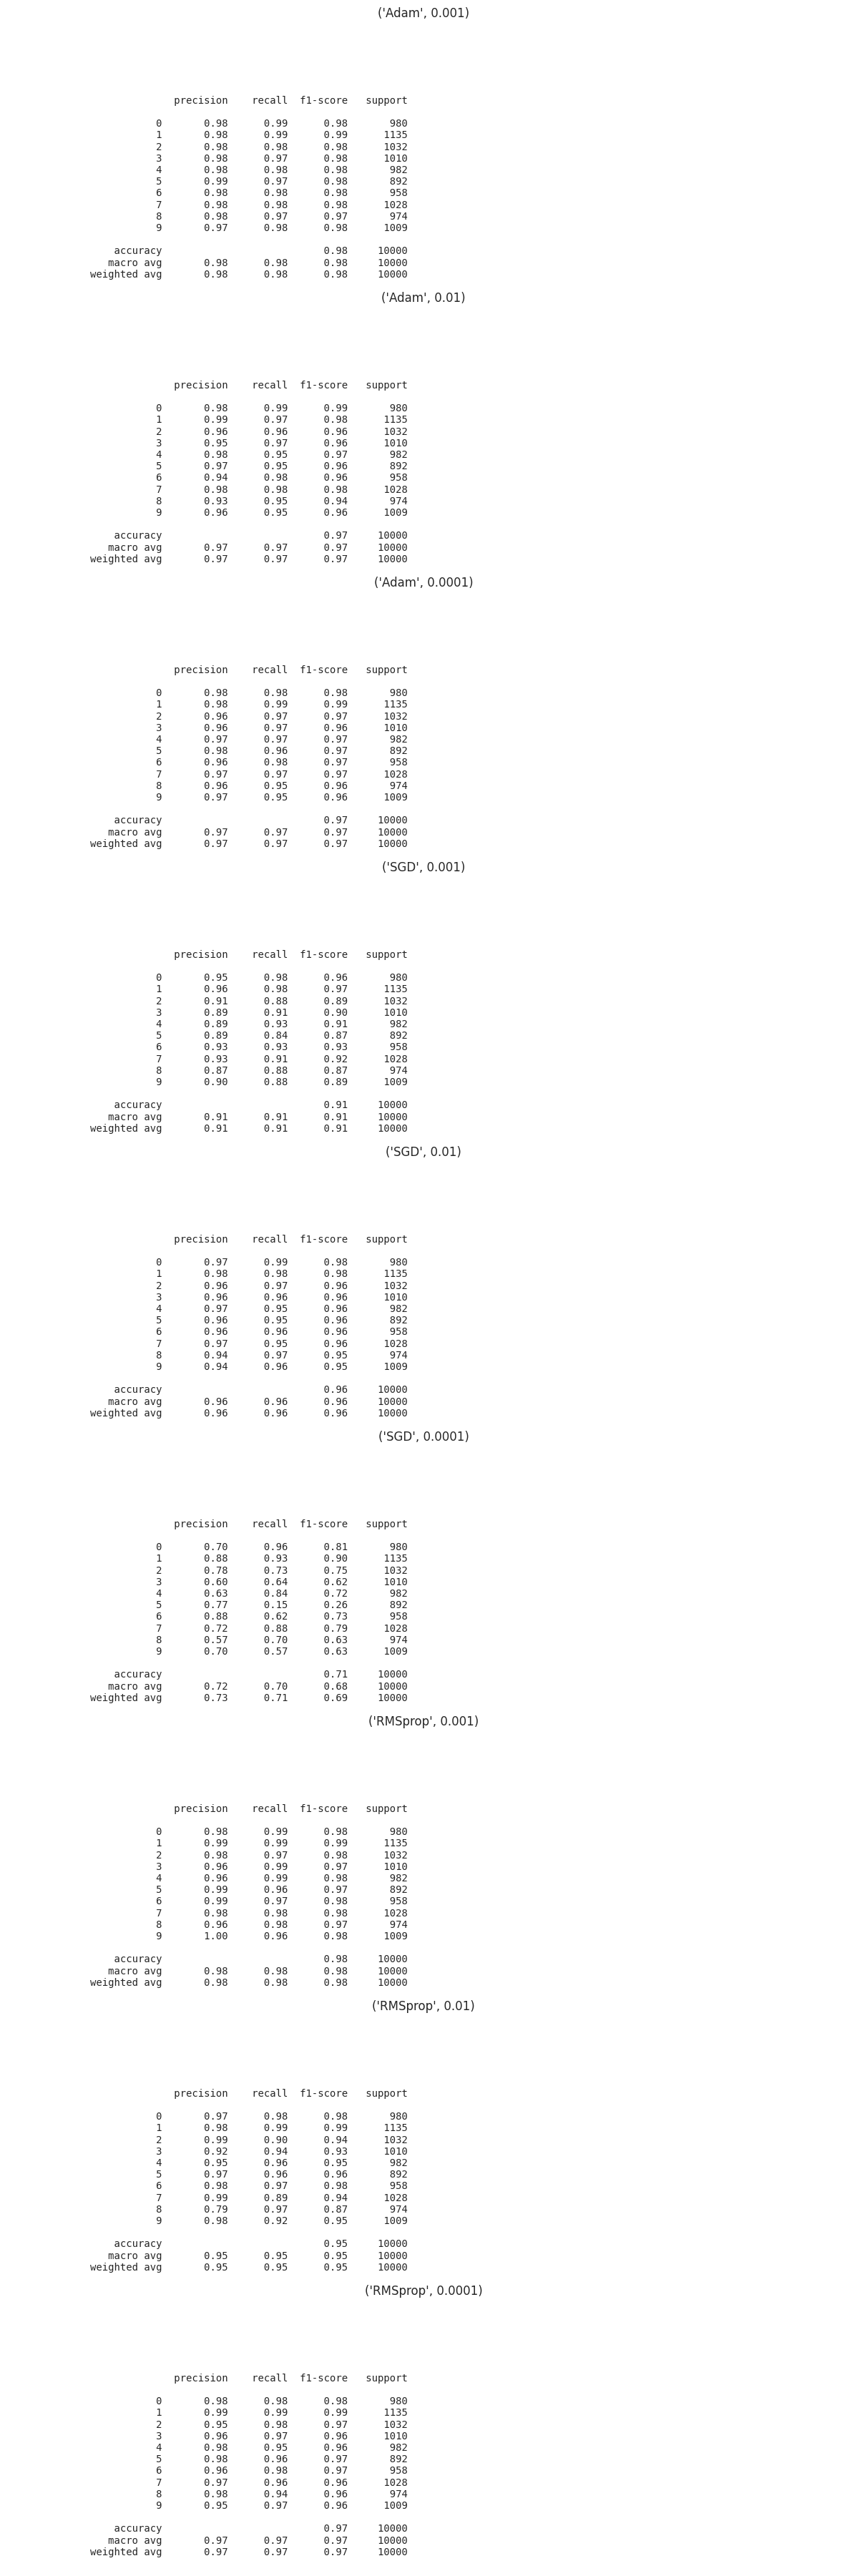


                               CONFUSION MATRICES                               



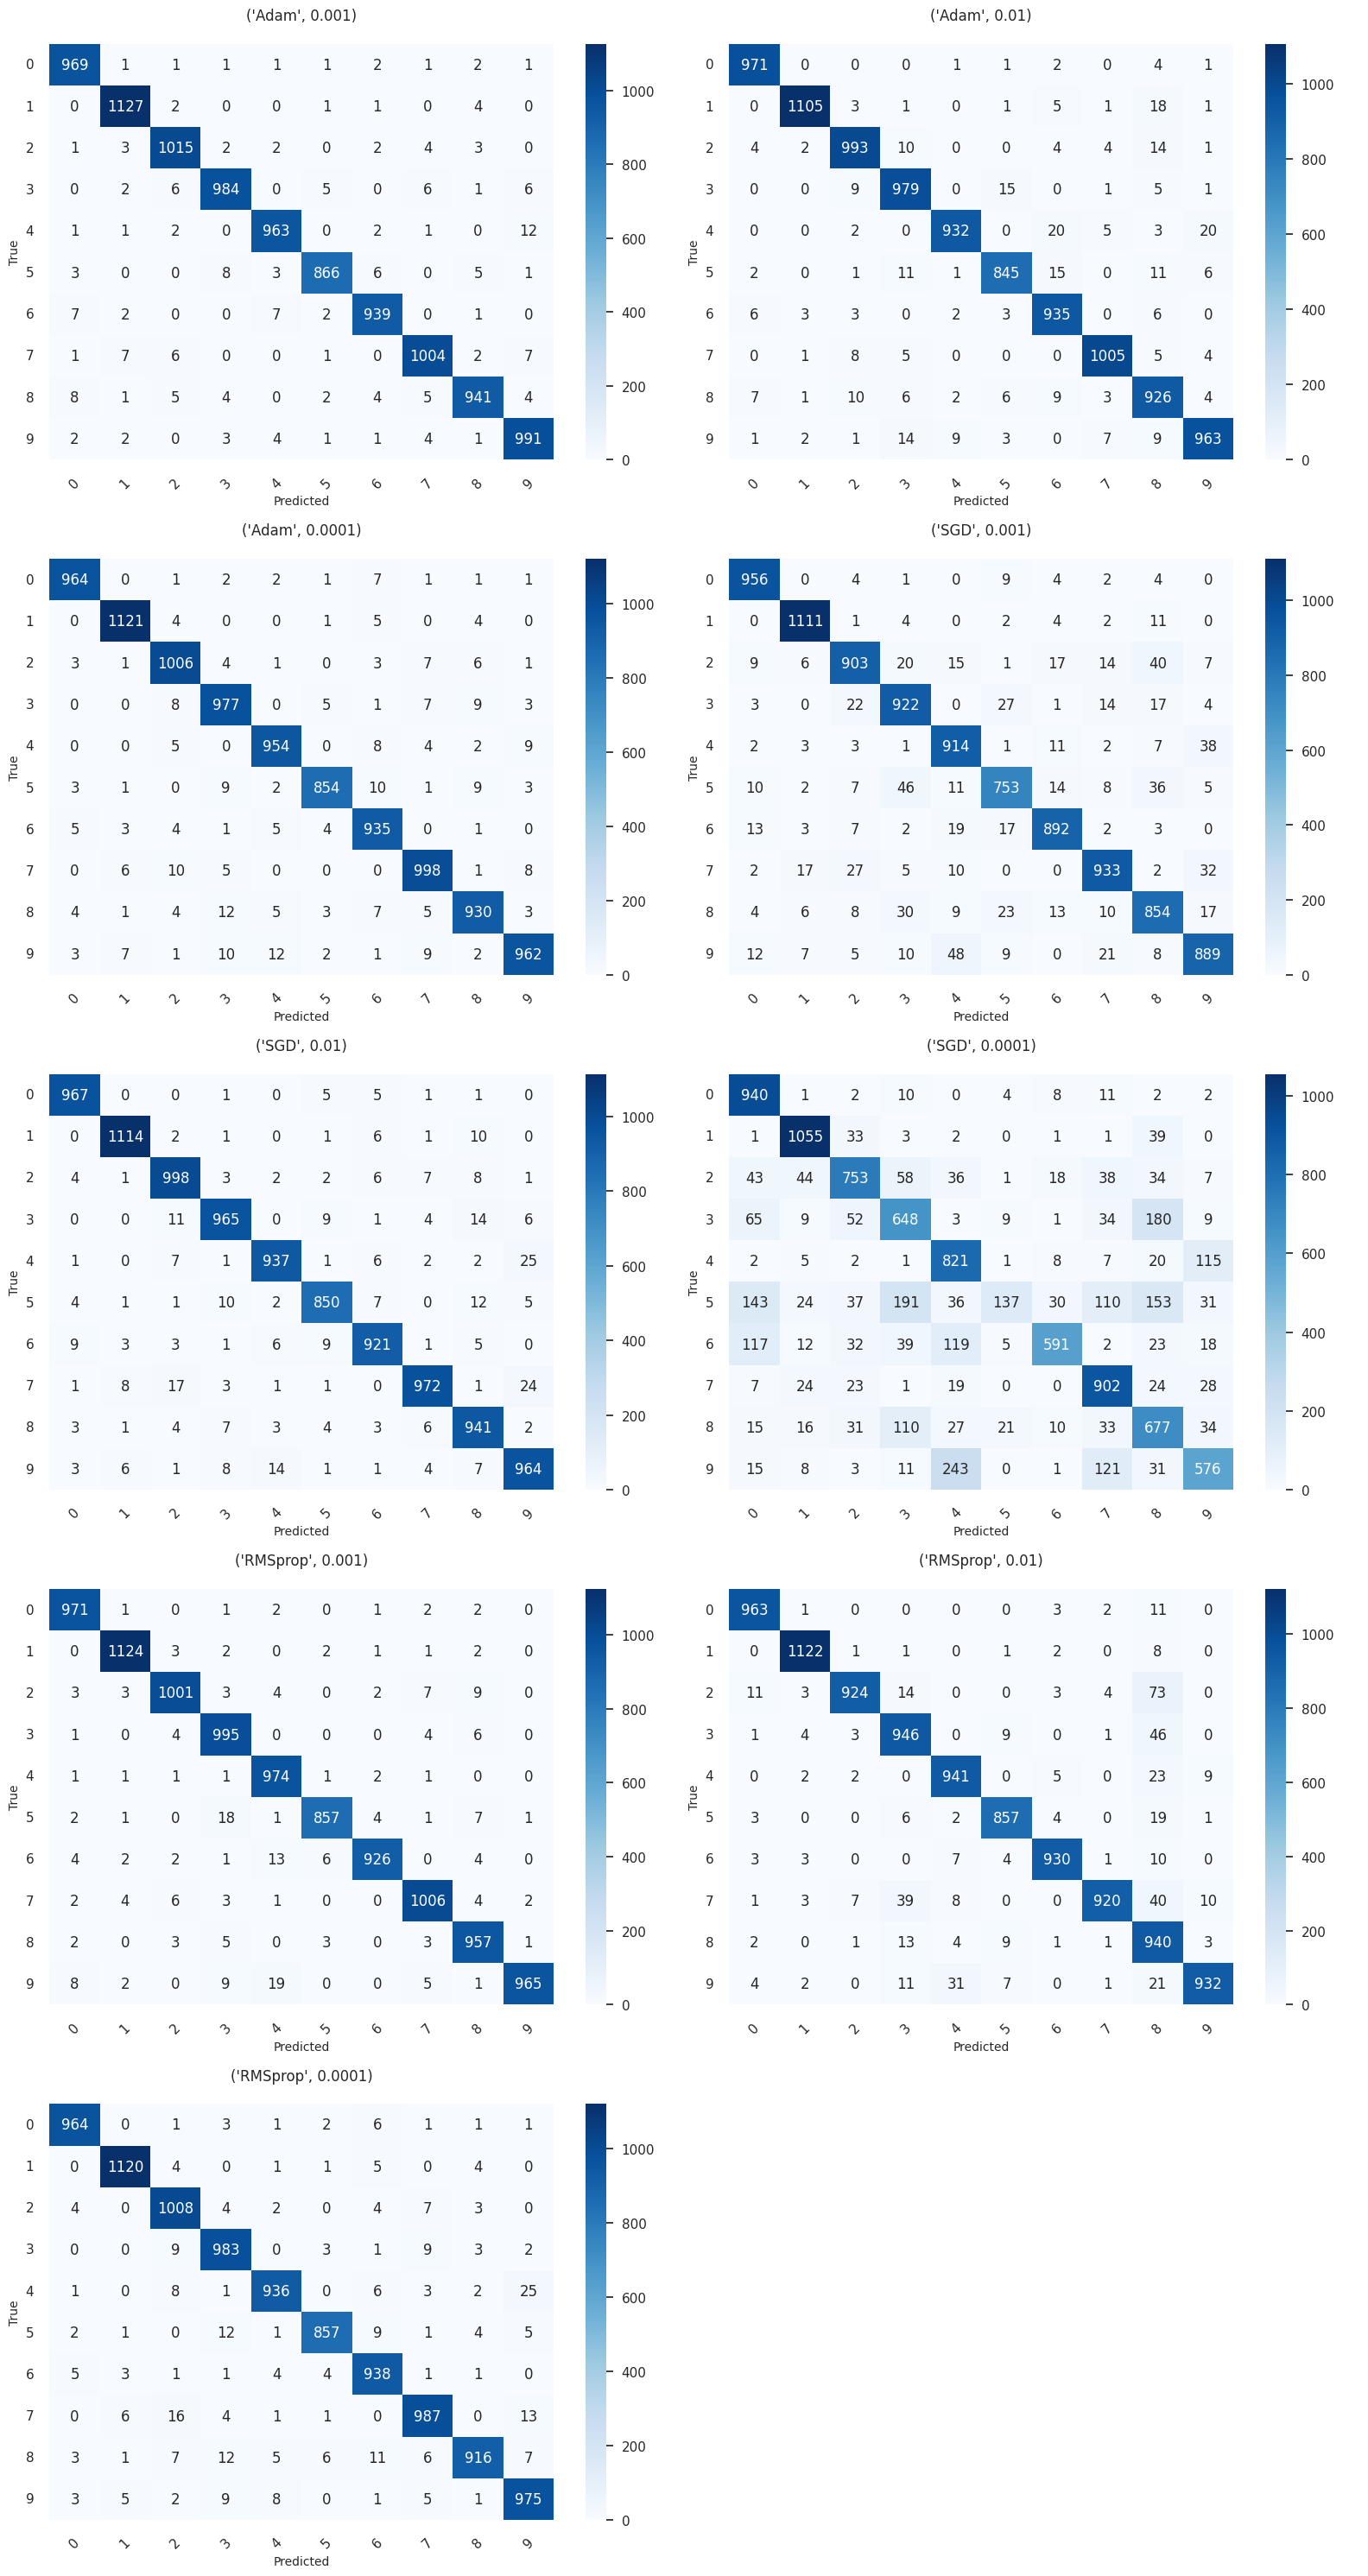

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap

def print_report_matrix(models_dict, test_images, test_labels, class_names=None):
    # Set visual style
    plt.style.use('seaborn-v0_8') if 'seaborn-v0_8' in plt.style.available else plt.style.use('ggplot')
    sns.set_theme(style="whitegrid")
    sns.set_palette("pastel")

    # ====================
    # Classification Reports
    # ====================
    print("\n" + "="*80)
    print("CLASSIFICATION REPORTS".center(80))
    print("="*80 + "\n")

    plt.figure(figsize=(12, 4*len(models_dict)))

    for i, (model_name, model) in enumerate(models_dict.items(), 1):
        y_pred = model.predict(test_images, verbose=0)
        y_pred_classes = np.argmax(y_pred, axis=1)
        true_classes = np.argmax(test_labels, axis=1)

        report = classification_report(true_classes, y_pred_classes,
                                    target_names=class_names)

        ax = plt.subplot(len(models_dict), 1, i)
        ax.text(0.1, 0.1, report, fontfamily='monospace', fontsize=10, va='top')
        ax.set_title(f"{model_name}", pad=20, fontsize=12)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

    # =================
    # Confusion Matrices
    # =================
    print("\n" + "="*80)
    print("CONFUSION MATRICES".center(80))
    print("="*80 + "\n")

    n_models = len(models_dict)
    n_cols = min(2, n_models)
    n_rows = (n_models + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6*n_rows))
    if n_models == 1:
        axes = np.array([axes])
    axes = axes.flatten()

    for i, (model_name, model) in enumerate(models_dict.items()):
        y_pred = model.predict(test_images, verbose=0)
        y_pred_classes = np.argmax(y_pred, axis=1)
        true_classes = np.argmax(test_labels, axis=1)

        cm = confusion_matrix(true_classes, y_pred_classes)

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=class_names,
                   yticklabels=class_names,
                   ax=axes[i])

        axes[i].set_title(f"{model_name}", pad=20, fontsize=12)
        axes[i].set_xlabel('Predicted', fontsize=10)
        axes[i].set_ylabel('True', fontsize=10)
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].tick_params(axis='y', rotation=0)

    # Hide unused axes
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
print_report_matrix(trained_models, test_images, test_labels, class_names=class_names)

### Loss and Accuracy Curves

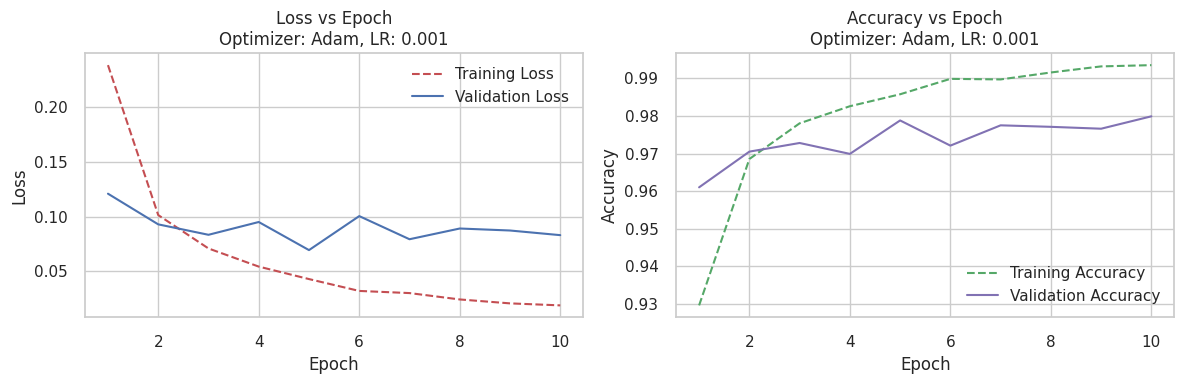

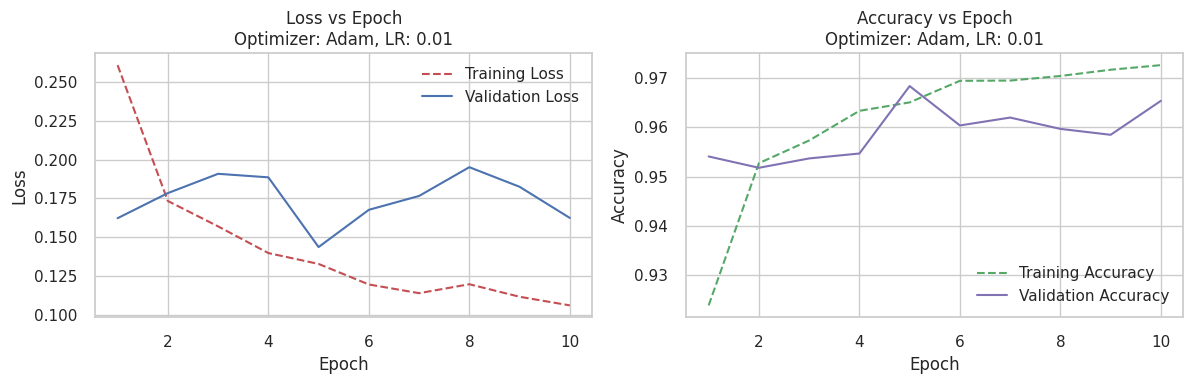

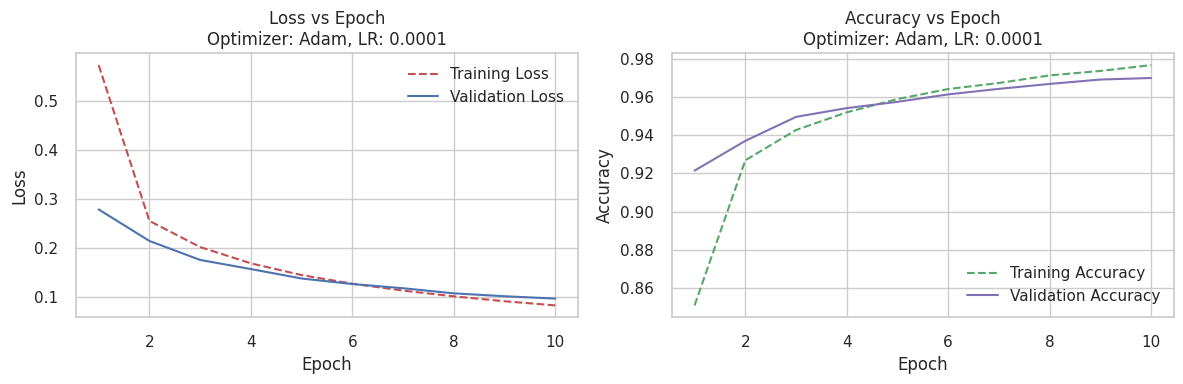

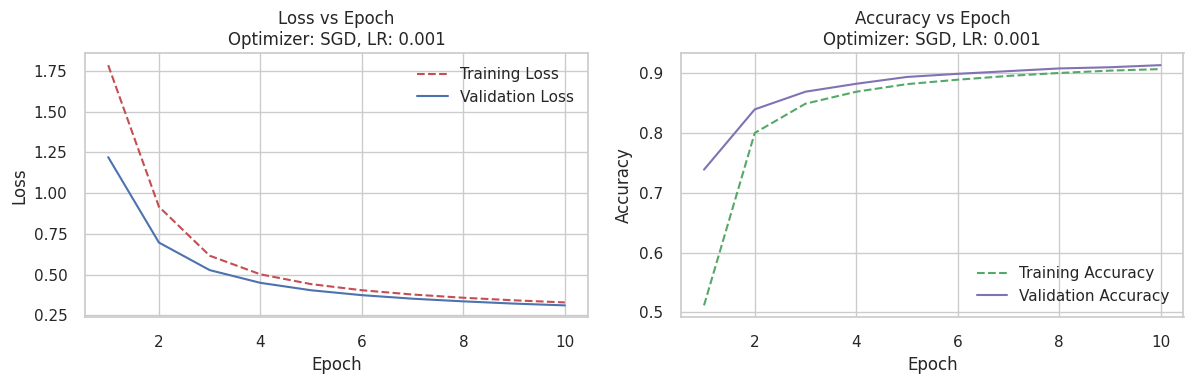

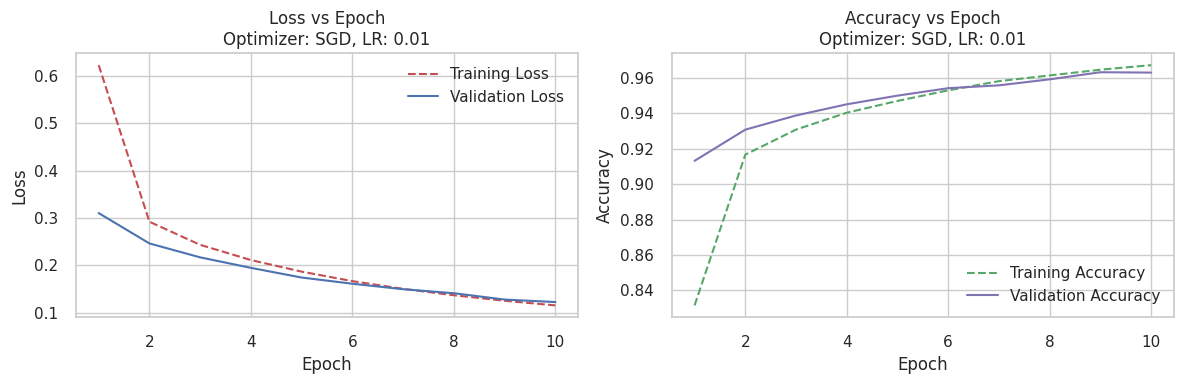

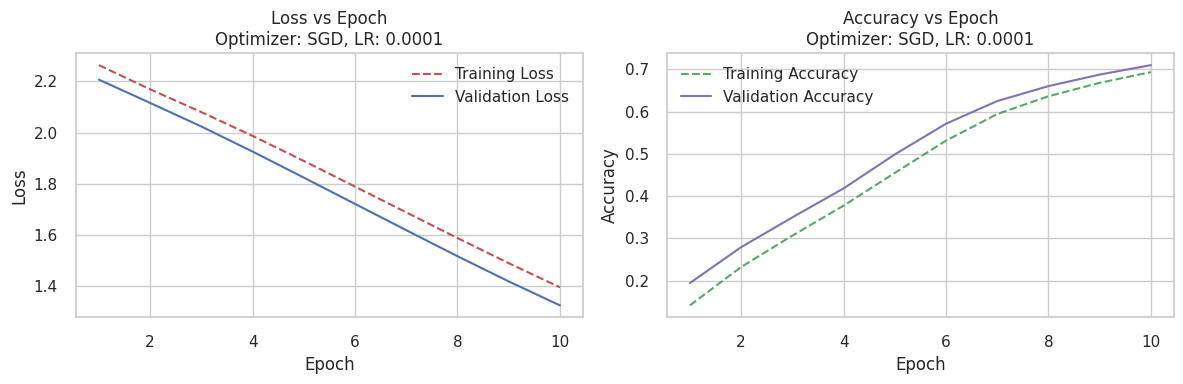

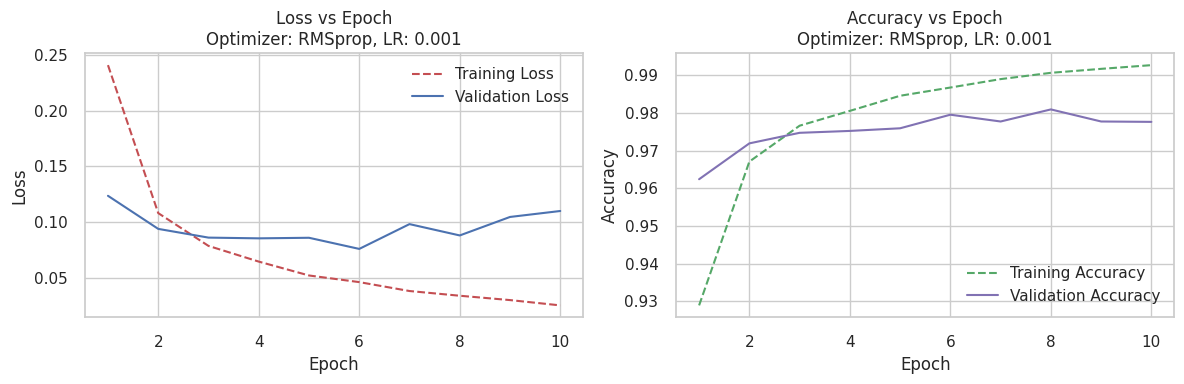

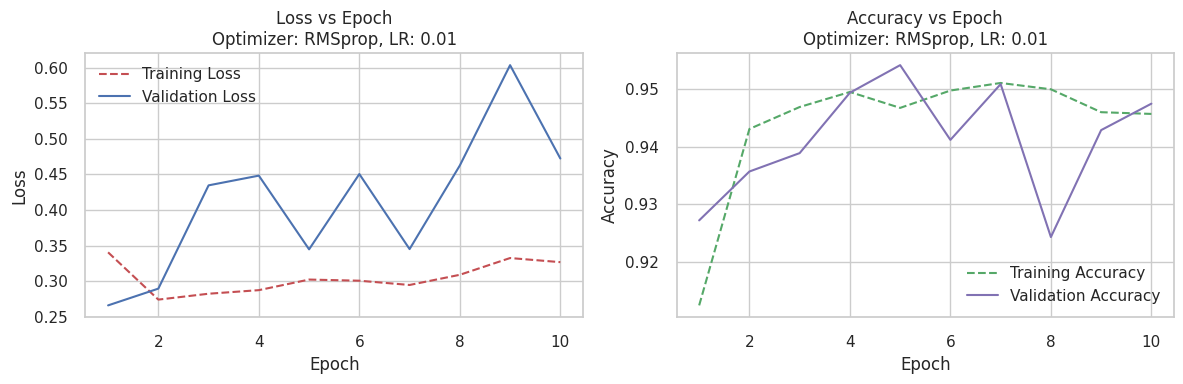

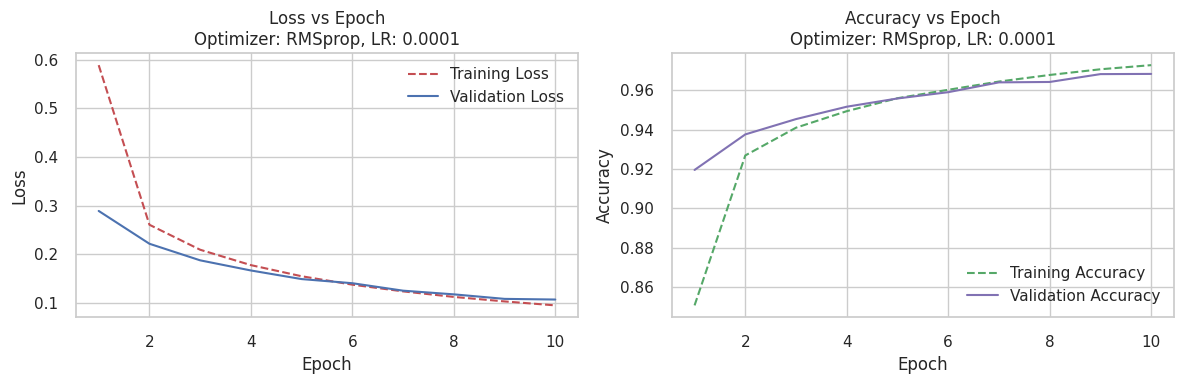

In [ ]:
# Plot Loss and Accuracy Curve for each model
for key, history in history_dictA.items():
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        epochs = range(1, len(history.history['loss']) + 1)
        training_loss = history.history['loss']
        validation_loss = history.history['val_loss']
        training_acc = history.history['accuracy']
        validation_acc = history.history['val_accuracy']

        axes[0].plot(epochs, training_loss, 'r--', label='Training Loss')
        axes[0].plot(epochs, validation_loss, 'b-', label='Validation Loss')
        axes[0].set_xlabel('Epoch')
        axes[0].set_ylabel('Loss')
        axes[0].set_title(f'Loss vs Epoch\nOptimizer: {key[0]}, LR: {key[1]}')
        axes[0].legend()

        axes[1].plot(epochs, training_acc, 'g--', label='Training Accuracy')
        axes[1].plot(epochs, validation_acc, 'm-', label='Validation Accuracy')
        axes[1].set_xlabel('Epoch')
        axes[1].set_ylabel('Accuracy')
        axes[1].set_title(f'Accuracy vs Epoch\nOptimizer: {key[0]}, LR: {key[1]}')
        axes[1].legend()

        plt.tight_layout()
        plt.show()

### ROC-AUC Curves

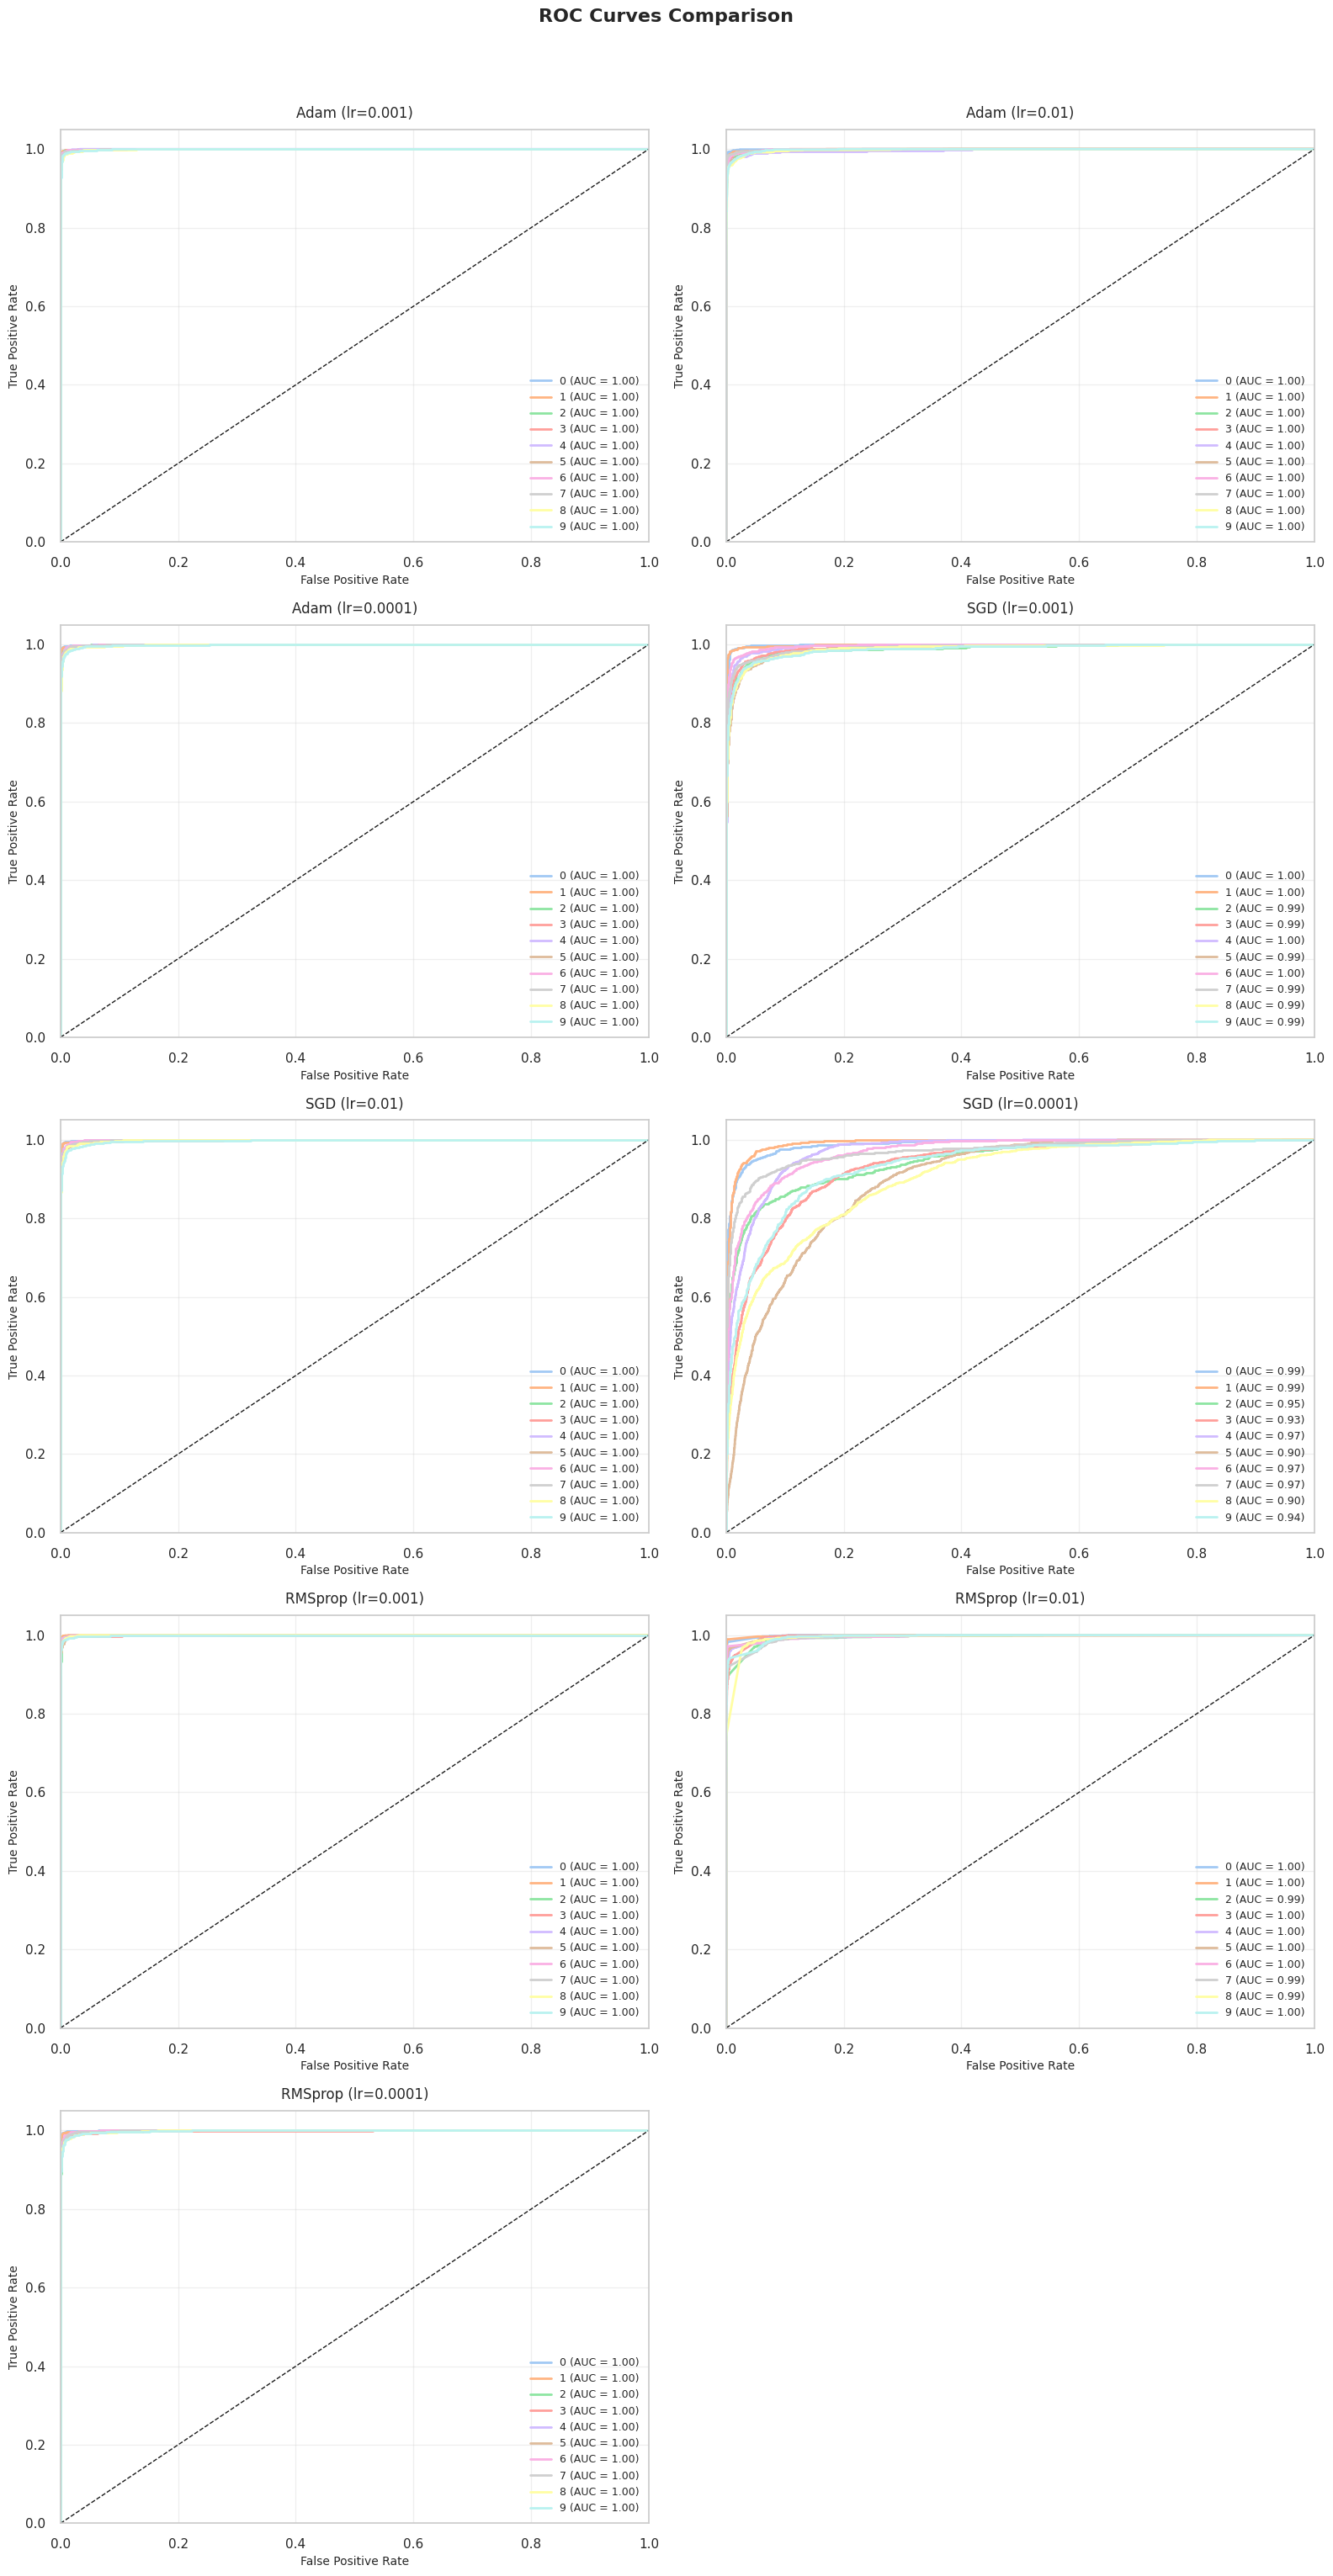

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from math import ceil

def plot_roc_curves(models, test_images, test_labels, class_names=None):
    """
    Plot ROC curves for multiple models in a grid layout

    Args:
        models: Dictionary of trained models
        test_images: Test images
        test_labels: One-hot encoded test labels
        class_names: List of class names (optional)
    """
    # Calculate grid size
    n_models = len(models)
    n_cols = 2  # Number of columns in the grid
    n_rows = ceil(n_models / n_cols)

    # Create figure
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 6*n_rows))
    fig.suptitle('ROC Curves Comparison', y=1.02, fontsize=16, fontweight='bold')

    # If only one model, convert axs to array for consistent handling
    if n_models == 1:
        axs = np.array([axs])

    # Flatten axes array for easy iteration
    axs = axs.flatten()

    # Plot ROC curves for each model
    for ax, (model_name, model) in zip(axs, models.items()):
        # Get predictions
        y_prob = model.predict(test_images, verbose=0)
        y_true = test_labels

        # Plot ROC curve for each class
        for i in range(test_labels.shape[1]):
            fpr, tpr, _ = roc_curve(y_true[:, i], y_prob[:, i])
            roc_auc = auc(fpr, tpr)

            # Use class names if available, otherwise use class index
            label_name = class_names[i] if class_names else f'Class {i}'
            ax.plot(fpr, tpr, lw=2,
                   label=f'{label_name} (AUC = {roc_auc:.2f})')

        # Formatting
        ax.plot([0, 1], [0, 1], 'k--', lw=1)
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate', fontsize=10)
        ax.set_ylabel('True Positive Rate', fontsize=10)

        # Use model name as title
        title = f'{model_name[0]} (lr={model_name[1]})' if isinstance(model_name, tuple) else model_name
        ax.set_title(title, fontsize=12, pad=10)

        ax.grid(alpha=0.3)
        ax.legend(loc='lower right', fontsize=9)

    # Hide any unused subplots
    for i in range(n_models, len(axs)):
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
plot_roc_curves(trained_models, test_images, test_labels, class_names=class_names)

## Comparative Analysis of all the models

### Accuracy and Loss Curves per Optimizer

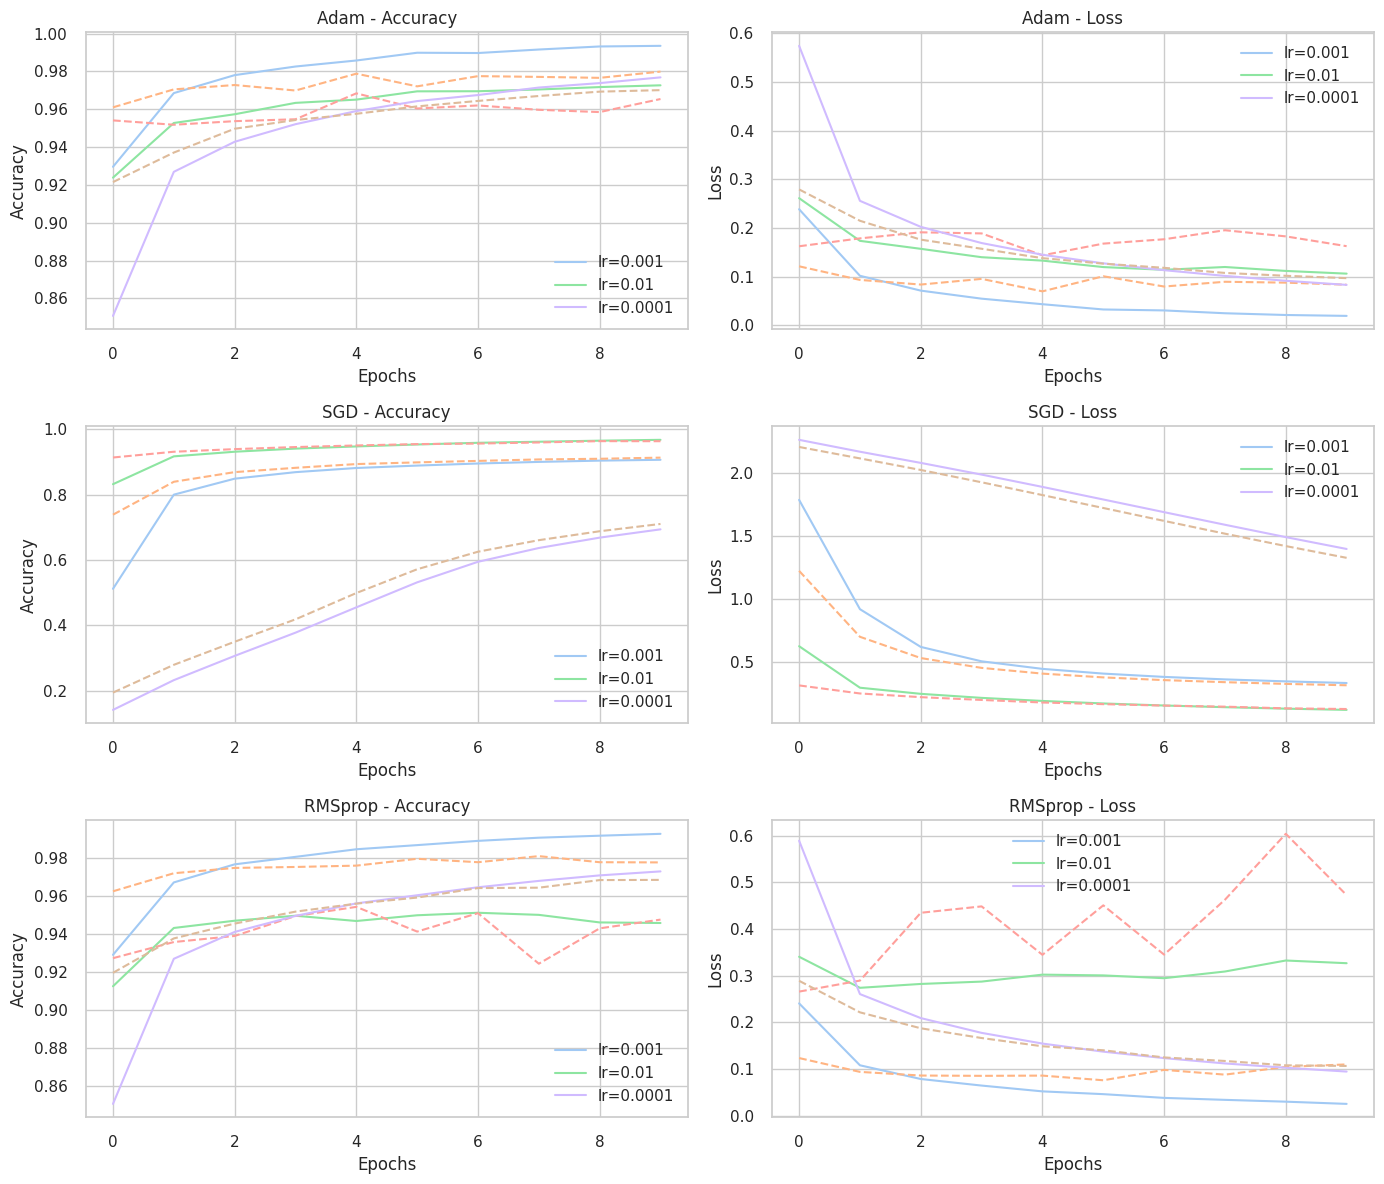

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 2, figsize=(14, 12))
optimizer_names = ['Adam', 'SGD', 'RMSprop']

for i, opt_name in enumerate(optimizer_names):
    ax_acc = axs[i][0]
    ax_loss = axs[i][1]
    ax_acc.set_title(f'{opt_name} - Accuracy')
    ax_loss.set_title(f'{opt_name} - Loss')

    for (opt, lr), history in history_dictA.items():
        if opt == opt_name:
            label = f"lr={lr}"
            ax_acc.plot(history.history['accuracy'], label=label)
            ax_acc.plot(history.history['val_accuracy'], linestyle='--')
            ax_loss.plot(history.history['loss'], label=label)
            ax_loss.plot(history.history['val_loss'], linestyle='--')

    ax_acc.set_ylabel('Accuracy')
    ax_loss.set_ylabel('Loss')
    ax_acc.set_xlabel('Epochs')
    ax_loss.set_xlabel('Epochs')
    ax_acc.grid(True)
    ax_loss.grid(True)
    ax_acc.legend()
    ax_loss.legend()

plt.tight_layout()
plt.show()


### ROC-AUC curves per Optimizer

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


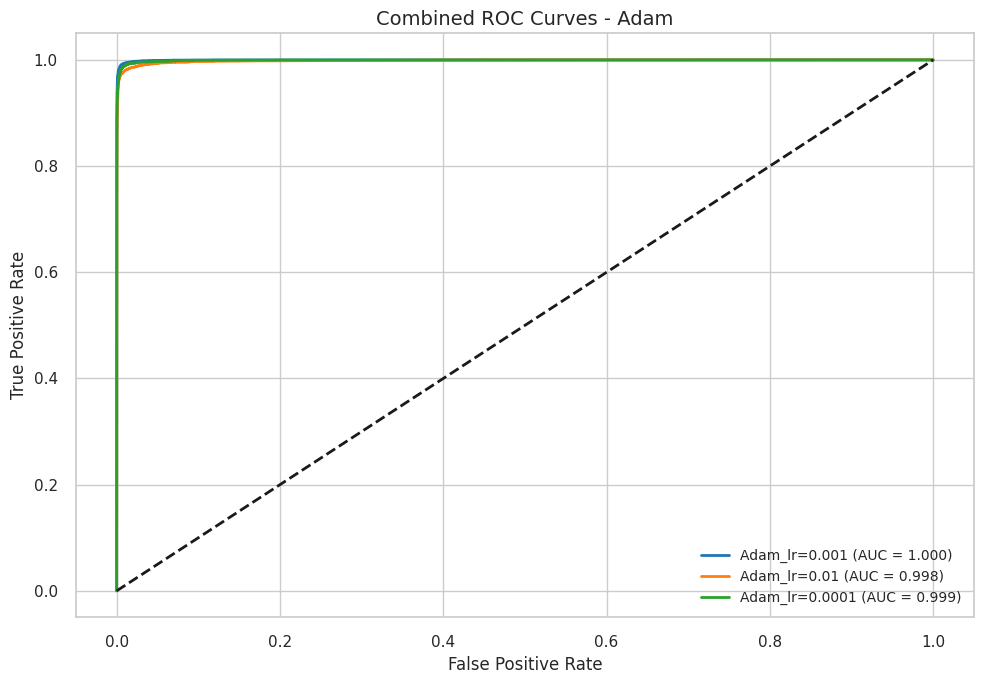

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


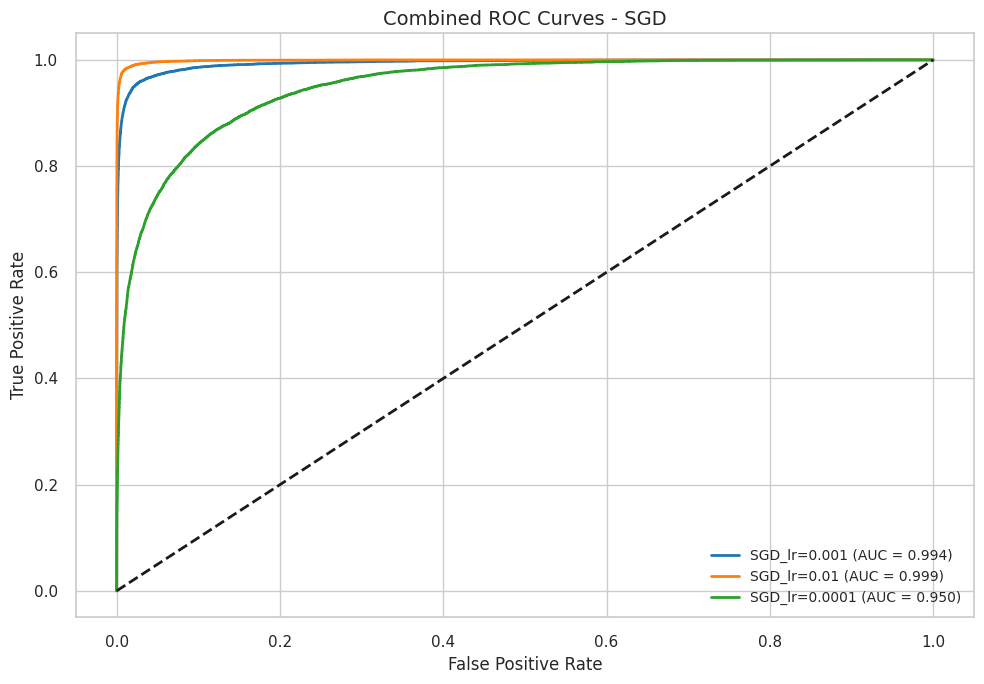

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


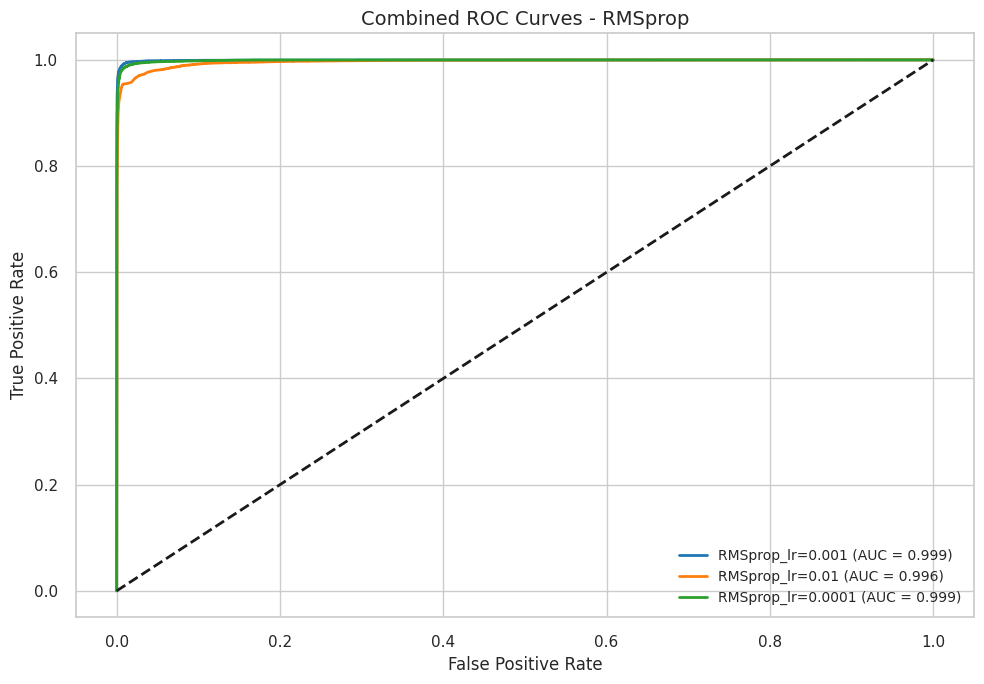

In [ ]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import matplotlib.pyplot as plt

# You need one-hot encoded test labels
y_test = test_labels
x_test = test_images

optimizer_groups = {}
for (opt, lr), model in trained_models.items():
    if opt not in optimizer_groups:
        optimizer_groups[opt] = []
    optimizer_groups[opt].append((f"{opt}_lr={lr}", model))

for optimizer, models_list in optimizer_groups.items():
    plt.figure(figsize=(10, 7))
    colors = cycle(plt.cm.tab10.colors)

    for label, model in models_list:
        y_score = model.predict(x_test)
        fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, color=next(colors), label=f"{label} (AUC = {roc_auc:.3f})")

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.title(f"Combined ROC Curves - {optimizer}", fontsize=14)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='lower right', fontsize='small')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### Validation Accuracy Comparison per Optimizer

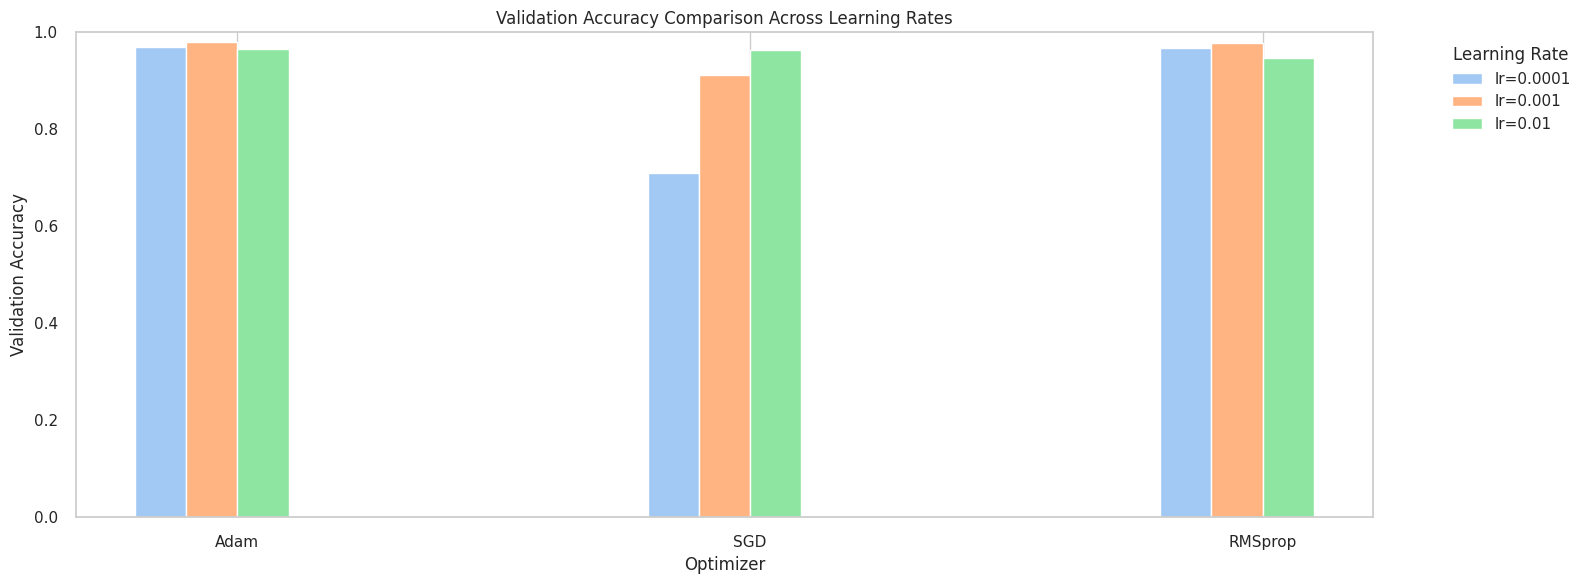

In [ ]:
# Bar Plot: Final Validation Accuracy
bar_data = {}

for (opt, lr), history in history_dictA.items():
    if opt not in bar_data:
        bar_data[opt] = {}
    bar_data[opt][f"lr={lr}"] = history.history['val_accuracy'][-1]

optimizers = list(bar_data.keys())
configs = sorted({cfg for opt in bar_data.values() for cfg in opt})
val_acc_matrix = [[bar_data[opt].get(cfg, 0) for cfg in configs] for opt in optimizers]

x = np.arange(len(optimizers))
width = 0.1

plt.figure(figsize=(16, 6))
for i, cfg in enumerate(configs):
    plt.bar(x + i * width, [val_acc_matrix[j][i] for j in range(len(optimizers))], width=width, label=cfg)

plt.ylabel('Validation Accuracy')
plt.xlabel('Optimizer')
plt.title('Validation Accuracy Comparison Across Learning Rates')
plt.xticks(x + width * (len(configs) / 2), optimizers)
plt.ylim([0, 1])
plt.legend(title='Learning Rate', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Comparitive Accuracy and Loss curves of all models

<ipython-input-10-147dbf53c149>:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


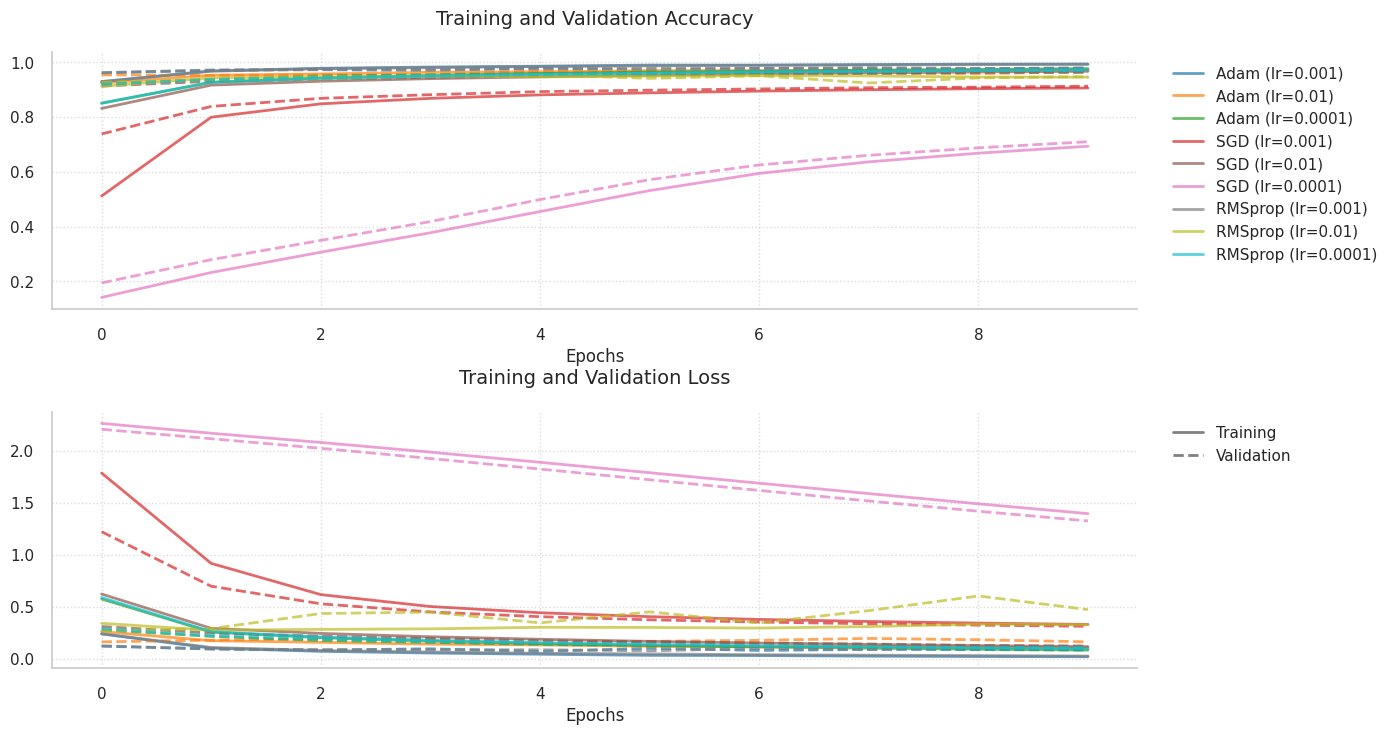

In [ ]:
import numpy as np

plt.figure(figsize=(14, 8))

gs = plt.GridSpec(2, 3, height_ratios=[1, 1], hspace=0.4, wspace=0.3)
ax_acc = plt.subplot(gs[0, :])
ax_loss = plt.subplot(gs[1, :])

colors = plt.cm.tab10(np.linspace(0, 1, len(history_dictA)))

for i, ((opt, lr), history) in enumerate(history_dictA.items()):
    label = f"{opt} (lr={lr})"
    ax_acc.plot(history.history['accuracy'], color=colors[i], linestyle='-', linewidth=2, alpha=0.7, label=label)
    ax_acc.plot(history.history['val_accuracy'], color=colors[i], linestyle='--', linewidth=2, alpha=0.7)

    ax_loss.plot(history.history['loss'], color=colors[i], linestyle='-', linewidth=2, alpha=0.7, label=label)
    ax_loss.plot(history.history['val_loss'], color=colors[i], linestyle='--', linewidth=2, alpha=0.7)

ax_acc.set_title('Training and Validation Accuracy', pad=20, fontsize=14)
ax_loss.set_title('Training and Validation Loss', pad=20, fontsize=14)

for ax in [ax_acc, ax_loss]:
    ax.set_xlabel('Epochs', fontsize=12)
    ax.grid(True, linestyle=':', alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

handles, labels = ax_acc.get_legend_handles_labels()
unique_labels = list(dict.fromkeys(labels))
ax_acc.legend(handles[:len(unique_labels)], unique_labels, bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='gray', linestyle='-', lw=2),
                Line2D([0], [0], color='gray', linestyle='--', lw=2)]
ax_loss.legend(custom_lines, ['Training', 'Validation'], bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.show()


### Classification Metrics comparison in table format

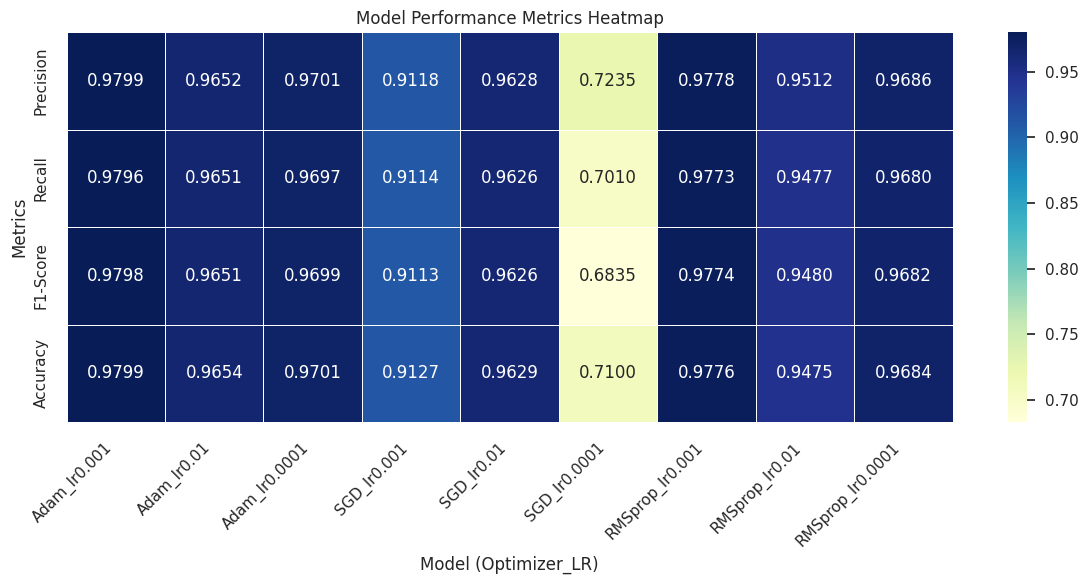


================= BEST MODEL: Adam_lr0.001 =================
Accuracy: 0.9799
Precision: 0.9799
Recall: 0.9796
F1-Score: 0.9798

Saved best model to: best_model_Adam_lr0.001.h5


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import joblib  # For saving the model

# Initialize dictionary to store metrics
model_metrics = {}
best_model = None
best_accuracy = 0

# Class names (assuming 10 classes)
class_names = [str(i) for i in range(10)]

# Analyze each model
for key, model in trained_models.items():
    # Predict and convert to class indices
    y_pred = np.argmax(model.predict(test_images, verbose=0), axis=1)
    y_true = np.argmax(test_labels, axis=1)

    # Get classification report
    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

    # Calculate average metrics
    precision = np.mean([report[str(i)]['precision'] for i in range(10)])
    recall = np.mean([report[str(i)]['recall'] for i in range(10)])
    f1 = np.mean([report[str(i)]['f1-score'] for i in range(10)])
    accuracy = report['accuracy']

    # Store metrics
    model_name = f"{key[0]}_lr{key[1]}"
    model_metrics[model_name] = [precision, recall, f1, accuracy]

    # Track best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = model_name

# Create DataFrame for heatmap
metrics_df = pd.DataFrame(model_metrics, index=['Precision', 'Recall', 'F1-Score', 'Accuracy'])

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(metrics_df, annot=True, fmt=".4f", cmap="YlGnBu", linewidths=0.5)
plt.title("Model Performance Metrics Heatmap")
plt.ylabel("Metrics")
plt.xlabel("Model (Optimizer_LR)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print best model info
print("\n" + "="*60)
print(f" BEST MODEL: {best_model_name} ".center(60, "="))
print("="*60)
print(f"Accuracy: {best_accuracy:.4f}")
print(f"Precision: {metrics_df[best_model_name]['Precision']:.4f}")
print(f"Recall: {metrics_df[best_model_name]['Recall']:.4f}")
print(f"F1-Score: {metrics_df[best_model_name]['F1-Score']:.4f}")
print("="*60)



best_model.save(f"best_model_{best_model_name}.h5")
print(f"\nSaved best model to: best_model_{best_model_name}.h5")

### Testing the best performing Model

In [ ]:
import cv2

best_model = build_modelA()
best_model.load_weights("best_model_Adam_lr0.001.h5")
def upload_and_predict(file_path):
    if file_path:
        # Load image in color to show original first
        original_image = cv2.imread(file_path)
        if original_image is None:
            print("Error loading image")
            return

        # Display original image first
        plt.figure(figsize=(6, 6))
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.title("Original Uploaded Image")
        plt.axis('off')
        plt.show()

        # Now process for prediction
        # Convert to grayscale
        image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

        # Resize, invert, and normalize
        image = cv2.resize(image, (28, 28))
        image = cv2.bitwise_not(image)
        image = image.astype('float32') / 255.0  # Normalize

        # Display the processed image
        plt.figure(figsize=(6, 6))
        plt.imshow(image, cmap='gray')
        plt.title("Processed Image (28x28 grayscale)")
        plt.axis('off')
        plt.show()

        # Reshape correctly (flatten)
        image = image.reshape(1, 28 * 28)  # Flatten to (1, 784)

        # Make prediction
        predictions = best_model.predict(image)
        top_prediction = np.argmax(predictions)
        confidence = predictions[0][top_prediction] * 100

        print(f"\nPrediction Results:")
        print(f"Predicted Label: {top_prediction}")
        print(f"Confidence: {confidence:.2f}%")

        # Print all class probabilities if desired
        print("\nClass Probabilities:")
        for i, prob in enumerate(predictions[0]):
            print(f"Class {i}: {prob*100:.2f}%")
    else:
        print("No file selected.")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


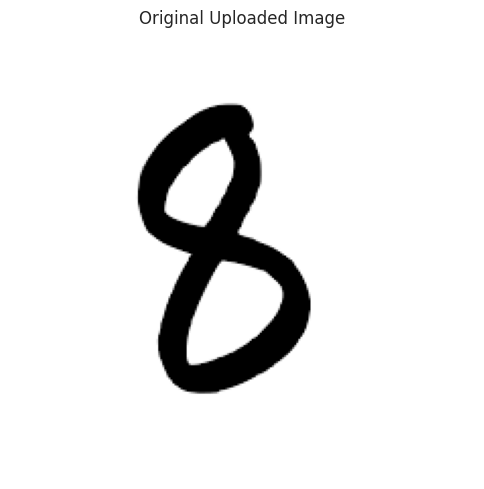

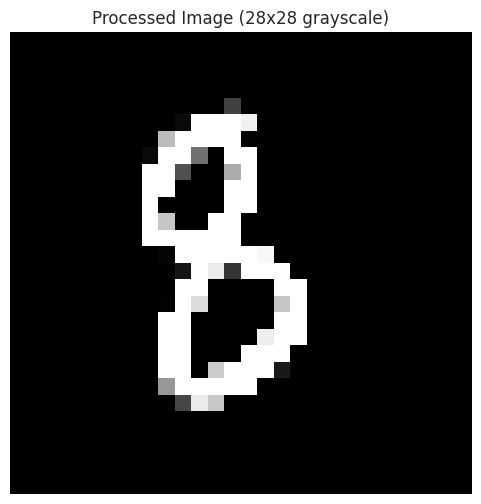

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Prediction Results:
Predicted Label: 8
Confidence: 59.62%

Class Probabilities:
Class 0: 0.00%
Class 1: 0.00%
Class 2: 0.00%
Class 3: 0.00%
Class 4: 0.00%
Class 5: 39.77%
Class 6: 0.60%
Class 7: 0.00%
Class 8: 59.62%
Class 9: 0.00%


In [ ]:
upload_and_predict("/content/8_dl1.png")


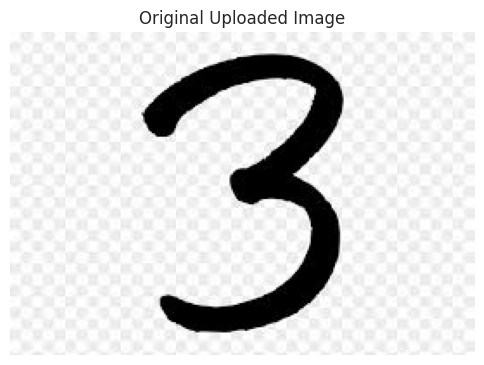

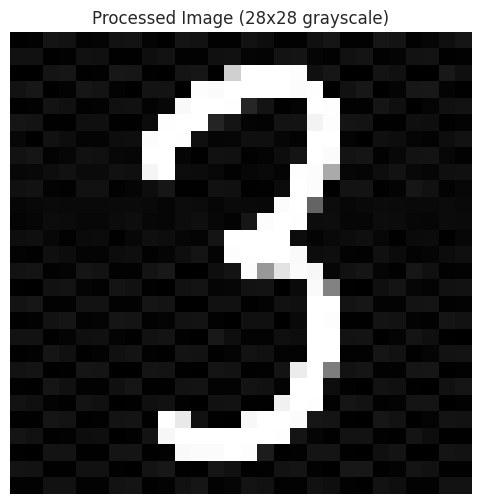

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

Prediction Results:
Predicted Label: 3
Confidence: 100.00%

Class Probabilities:
Class 0: 0.00%
Class 1: 0.00%
Class 2: 0.00%
Class 3: 100.00%
Class 4: 0.00%
Class 5: 0.00%
Class 6: 0.00%
Class 7: 0.00%
Class 8: 0.00%
Class 9: 0.00%
Error loading image


In [ ]:
upload_and_predict("/content/3_dl.jpeg")


## Conclusion:

In this notebook we trained 9 different dnn on inbuilt MNIST dataset the best performing model used Adam optimizer and had learning rate of 0.001. The best performing model performed with accuracy of  0.9799, precision 0.9799, f1-score  0.9798 and recall  0.9796 and predicted correct class upon testing. The model with the worst performance used SGD optimizer with learning rate of 0.0001 which had accuracy of 0.71.
